In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model performance load

### k-mers

In [2]:
k = pd.read_csv('../../k-mers/output/performance_models_cauliflower_kohlrabi_kmers.csv')
k

,Training_set,Testing_set,corr,R^2,MSE
0,Cauliflower,Cauliflower,0.827,0.479,0.005
1,Kohlrabi,Kohlrabi,0.803,0.451,0.005
2,Cauliflower,Kohlrabi,0.830,0.495,0.004
3,Kohlrabi,Cauliflower,0.845,0.498,0.004
4,All_except_Cauliflower,Cauliflower,0.847,0.531,0.004
5,All_except_Kohlrabi,Kohlrabi,0.837,0.549,0.004


### Expression

In [3]:
e = pd.read_csv('../../expression/output/performance_models_cauliflower_kohlrabi_expression.csv')
e

,Training_set,Testing_set,corr,R^2,MSE
0,Cauliflower,Cauliflower,0.829,0.497,0.004
1,Kohlrabi,Kohlrabi,0.825,0.497,0.004
2,Cauliflower,Kohlrabi,0.844,0.521,0.004
3,Kohlrabi,Cauliflower,0.823,0.509,0.004
4,All_except_Cauliflower,Cauliflower,0.850,0.489,0.004
5,All_except_Kohlrabi,Kohlrabi,0.844,0.502,0.004


### Transposons

In [4]:
t = pd.read_csv('../../transposons/output/performance_models_cauliflower_kohlrabi_transposons.csv')
t

,Training_set,Testing_set,corr,R^2,MSE
0,Cauliflower,Cauliflower,0.855,0.556,0.004
1,Kohlrabi,Kohlrabi,0.850,0.547,0.004
2,Cauliflower,Kohlrabi,0.874,0.591,0.004
3,Kohlrabi,Cauliflower,0.871,0.589,0.004
4,All_except_Cauliflower,Cauliflower,0.876,0.611,0.003
5,All_except_Kohlrabi,Kohlrabi,0.870,0.624,0.003


###  All 

In [5]:
a = pd.read_csv('../../all/output/performance_models_cauliflower_kohlrabi_all.csv')
a

,Training_set,Testing_set,corr,R^2,MSE
0,Cauliflower,Cauliflower,0.878,0.601,0.004
1,Kohlrabi,Kohlrabi,0.864,0.587,0.004
2,Cauliflower,Kohlrabi,0.878,0.621,0.003
3,Kohlrabi,Cauliflower,0.889,0.625,0.003
4,All_except_Cauliflower,Cauliflower,0.885,0.636,0.003
5,All_except_Kohlrabi,Kohlrabi,0.877,0.644,0.003


# Summary table

In [6]:
corr = pd.DataFrame({'corr':[k['corr'].mean().round(3), e['corr'].mean().round(3), t['corr'].mean().round(3), a['corr'].mean().round(3)]})
r2 = pd.DataFrame({'R^2':[k['R^2'].mean().round(3), e['R^2'].mean().round(3), t['R^2'].mean().round(3), a['R^2'].mean().round(3)]})
mse = pd.DataFrame({'MSE':[k['MSE'].mean().round(3), e['MSE'].mean().round(3), t['MSE'].mean().round(3), a['MSE'].mean().round(3)]})
label = pd.DataFrame({'Method': ['k-mers', 'Expression', 'Transposons', 'All']})

table = pd.concat([label, corr, r2, mse], axis=1)
table

,Method,corr,R^2,MSE
0,k-mers,0.831,0.500,0.004
1,Expression,0.836,0.502,0.004
2,Transposons,0.866,0.586,0.004
3,All,0.878,0.619,0.003


# Comparison plot

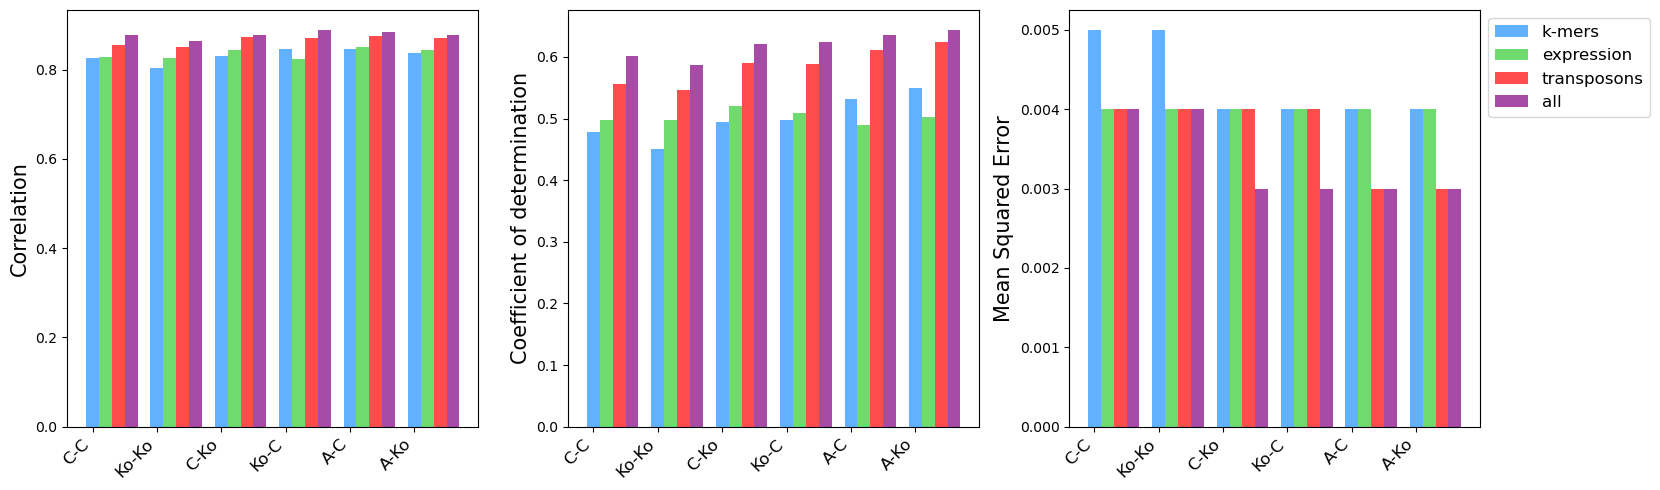

In [7]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_k = np.arange(len(k['corr']))
bar_positions_e = bar_positions_k + bar_width
bar_positions_t = bar_positions_e + bar_width
bar_positions_a = bar_positions_t + bar_width


# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k['corr'], color='dodgerblue', width=bar_width, label='k-mers', alpha=0.7)
axs[0].bar(bar_positions_e, e['corr'], color='limegreen', width=bar_width, label='expression', alpha=0.7)
axs[0].bar(bar_positions_t, t['corr'], color='red', width=bar_width, label='transposons', alpha=0.7)
axs[0].bar(bar_positions_a, a['corr'], color='purple', width=bar_width, label='all', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_k, k['R^2'], color='dodgerblue', width=bar_width, label='k-mers', alpha=0.7)
axs[1].bar(bar_positions_e, e['R^2'], color='limegreen', width=bar_width, label='expression', alpha=0.7)
axs[1].bar(bar_positions_t, t['R^2'], color='red', width=bar_width, label='transposons', alpha=0.7)
axs[1].bar(bar_positions_a, a['R^2'], color='purple', width=bar_width, label='all', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_k, k['MSE'], color='dodgerblue', width=bar_width, label='k-mers', alpha=0.7)
axs[2].bar(bar_positions_e, e['MSE'], color='limegreen', width=bar_width, label='expression', alpha=0.7)
axs[2].bar(bar_positions_t, t['MSE'], color='red', width=bar_width, label='transposons', alpha=0.7)
axs[2].bar(bar_positions_a, a['MSE'], color='purple', width=bar_width, label='all', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = ['C-C', 'Ko-Ko', 'C-Ko', 'Ko-C', 'A-C', 'A-Ko']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_k)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()